# modDR-Framework example: UCI-17 Breast Cancer Wisconsin (Diagnostic)

In this example, the moddr framework is demonstrated using the ‘UCI-17 Breast Cancer’ dataset from the UCI Machine Learning Repository. The dataset has a relatively small number of data points, such that the UMAP visualisation clearly shows a global structure, making it easy to examine shifts in individual data points.


The example is intended solely to demonstrate the functions of the framework. The selection of the feature chosen to model a similarity measure to be integrated was not based on content-related arguments, but solely on visual criteria.

Details about the dataset can be found at https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic.

The moddr package is required for execution (locally from https://github.com/kohaupt/modDR or as a PYPI package). Instructions for execution and installation can be found in the README.

## Imports

In [ ]:
# may require additional installations of the packages pandas, scikit-learn, ucimlrepo
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo

import moddr

## Data exploration

The following steps show the initial visualisation of the dataset using the DR method (here, UMAP), with the modelled property represented by the colour of the data points via the first principal component of PCA. The selection of features has no content-related significance; it merely illustrates the difference in neighbourhood structure compared to the DR's positioning.

In [4]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

pd.set_option("display.max_columns", None)
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# chosen features
sim_features = ["fractal_dimension1", "symmetry2", "texture3", "concave_points1"]

In [6]:
reference_embedding = moddr.processing.dimensionality_reduction_umap(X, n_neighbors=15)

In [7]:
# scale chosen feature values to avoid higher influence of certain features
scaler = MinMaxScaler()
X_sim_scaled = X[sim_features].copy()
for col in sim_features:
    X_sim_scaled[col] = scaler.fit_transform(X_sim_scaled[[col]])

sim_features_reduced = PCA(n_components=1).fit_transform(X_sim_scaled)
feat_labels = {i: sim_features_reduced[i] for i in range(len(sim_features_reduced))}
reference_embedding.labels = feat_labels
reference_embedding.obj_id = 0

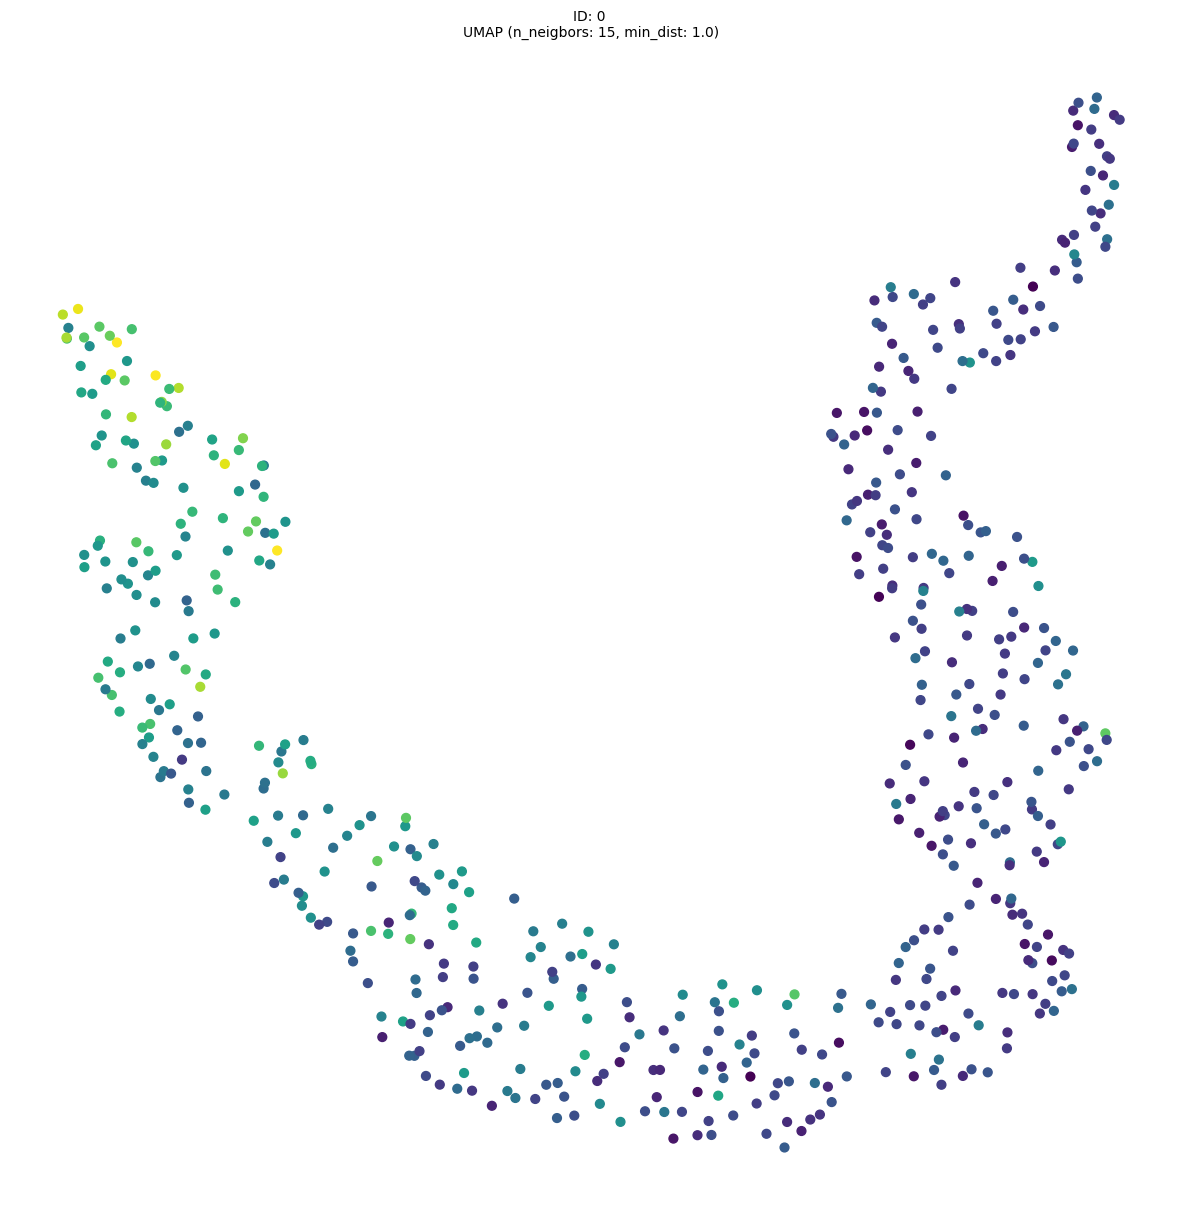

In [8]:
umap_plot = moddr.visualization.display_embeddings(
    [reference_embedding], figsize_columns=1, show_edges=False
)

## Modification via moddr-framework

The initial positioning is modified using the framework in the following way. To achieve this, the Fruchterman-Reingold (FR), Kamada-Kawai (KK) and MDS layout methods are applied in succession. Apart from the layout method, the same parameters are used for all test series (see below). Due to space constraints, outputs are omitted in the example notebooks and can be generated by local execution.

In [9]:
community_resolutions = [0.001, 0.005, 0.05, 0.2]
n_neighbors = 15
dr_method = "UMAP"
graph_method = "DR"
boundary_neighbors = False
layout_params_fr = [10, 100, 500, 1000]
layout_params_kk_mds = [0.2, 0.4, 0.6, 0.8, 1.0]

### Modification via Fruchterman-Reingold

In [10]:
mod_embeddings_fr = moddr.processing.run_pipeline(
    data=X,
    sim_features=sim_features,
    dr_method=dr_method,
    dr_param_n_neighbors=n_neighbors,
    graph_method=graph_method,
    community_resolutions=community_resolutions,
    layout_method="FR",
    boundary_neighbors=boundary_neighbors,
    layout_params=layout_params_fr,
    compute_metrics=True,
    verbose=True,
)

------------------------------------------------------------
Start moddr pipeline with the following parameters:
Similarity Features: ['fractal_dimension1', 'symmetry2', 'texture3', 'concave_points1']
Dimensionality Reduction Method: UMAP with 15 neighbors
Graph Construction Method: DR
Community Detection Resolutions: [0.001, 0.005, 0.05, 0.2]
Layout Method: FR
Boundary Neighbors: False
Layout Parameters: [10, 100, 500, 1000]
Compute Metrics: True

INFO: Inverting distances via 1 - distances, as normalization is applied.
------------------------------------------------------------
Computing communities via Leiden detection for embedding 0: `UMAP (n_neigbors: 15, min_dist: 1.0)' with resolution '0.001'.
Computation finished after 0.14 seconds.
Found 4 communities.
------------------------------------------------------------
------------------------------------------------------------
Compute new positions for embedding: `UMAP (n_neigbors: 15, min_dist: 1.0), Leiden (resolution: 0.001)'.

Detailed overview of all iterations

In [11]:
moddr.evaluation.create_report(mod_embeddings_fr, metadata=True, metrics=True)

,obj_id,dr_method,dr_params,k_neighbors,com_detection,com_detection_params,layout_method,layout_params,trustworthiness,continuity,rnx,sim_stress,sim_stress_com,sim_stress_com_diff,rank_score,distance_score,total_score
0,0,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,,{},,{},0.996819,0.998573,0.829415,0.689772,0.689772,0.000000,0.941603,0.405114,0.673358
1,1,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},FR,"{'iterations': 10, 'boundary_neighbors': False}",0.996297,0.991576,0.812417,0.721997,0.720110,-0.007797,0.933430,0.390951,0.662190
2,2,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},FR,"{'iterations': 100, 'boundary_neighbors': False}",0.995423,0.991051,0.779988,0.722539,0.744318,0.016410,0.922154,0.384628,0.653391
3,3,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},FR,"{'iterations': 500, 'boundary_neighbors': False}",0.995856,0.991019,0.779626,0.722454,0.745753,0.017846,0.922167,0.384312,0.653239
4,4,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},FR,"{'iterations': 1000, 'boundary_neighbors': False}",0.995758,0.990979,0.777697,0.722366,0.746096,0.018189,0.921478,0.384270,0.652874
5,5,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.005},FR,"{'iterations': 10, 'boundary_neighbors': False}",0.996804,0.992348,0.811212,0.693995,0.699461,-0.001047,0.933454,0.403264,0.668359
6,6,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.005},FR,"{'iterations': 100, 'boundary_neighbors': False}",0.996666,0.991776,0.796866,0.694231,0.713053,0.012545,0.928436,0.399748,0.664092
7,7,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.005},FR,"{'iterations': 500, 'boundary_neighbors': False}",0.996627,0.991784,0.795298,0.694182,0.713651,0.013143,0.927903,0.399623,0.663763
8,8,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.005},FR,"{'iterations': 1000, 'boundary_neighbors': False}",0.996657,0.991755,0.795539,0.694243,0.713713,0.013204,0.927984,0.399577,0.663781
9,9,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.05},FR,"{'iterations': 10, 'boundary_neighbors': False}",0.994248,0.995821,0.752743,0.690149,0.667647,-0.016171,0.914271,0.408968,0.661619


In [ ]:
metrics_report_fr = moddr.evaluation.create_report(
    mod_embeddings_fr, metadata=False, metrics=True
)
metrics_plot_fr = moddr.visualization.plot_metrics_report(metrics_report_fr)

In [ ]:
embedding_graphs_fr = moddr.visualization.display_embeddings(
    mod_embeddings_fr, figsize_columns=3, show_edges=False
)

### Modification via Kamada-Kawai

In [20]:
mod_embeddings_kk = moddr.processing.run_pipeline(
    data=X,
    sim_features=sim_features,
    dr_method=dr_method,
    dr_param_n_neighbors=n_neighbors,
    graph_method=graph_method,
    community_resolutions=community_resolutions,
    layout_method="KK",
    boundary_neighbors=boundary_neighbors,
    layout_params=layout_params_kk_mds,
    compute_metrics=True,
    verbose=True,
)

------------------------------------------------------------
Start moddr pipeline with the following parameters:
Similarity Features: ['fractal_dimension1', 'symmetry2', 'texture3', 'concave_points1']
Dimensionality Reduction Method: UMAP with 15 neighbors
Graph Construction Method: DR
Community Detection Resolutions: [0.001, 0.005, 0.05, 0.2]
Layout Method: KK
Boundary Neighbors: False
Layout Parameters: [0.2, 0.4, 0.6, 0.8, 1.0]
Compute Metrics: True

------------------------------------------------------------
Computing communities via Leiden detection for embedding 0: `UMAP (n_neigbors: 15, min_dist: 1.0)' with resolution '0.001'.
Computation finished after 0.03 seconds.
Found 4 communities.
------------------------------------------------------------
------------------------------------------------------------
Compute new positions for embedding: `UMAP (n_neigbors: 15, min_dist: 1.0), Leiden (resolution: 0.001)'.
Start computation with Kamada Kawai-algorithm.
Computation of new po

Detailed overview of all iterations

In [21]:
moddr.evaluation.create_report(mod_embeddings_kk, metadata=True, metrics=True)

,obj_id,dr_method,dr_params,k_neighbors,com_detection,com_detection_params,layout_method,layout_params,trustworthiness,continuity,rnx,sim_stress,sim_stress_com,sim_stress_com_diff,rank_score,distance_score,total_score
0,0,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,,{},,{},0.996819,0.998573,0.829415,0.689772,0.689772,0.000000,0.941603,0.405114,0.673358
1,1,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},KK,"{'balance_factor': 0.2, 'boundary_neighbors': ...",0.996547,0.998425,0.822664,0.690111,0.723864,-0.004044,0.939212,0.405956,0.672584
2,2,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},KK,"{'balance_factor': 0.4, 'boundary_neighbors': ...",0.996050,0.997938,0.810970,0.690640,0.719605,-0.008302,0.934986,0.406756,0.670871
3,3,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},KK,"{'balance_factor': 0.6, 'boundary_neighbors': ...",0.995532,0.997217,0.797348,0.691368,0.715165,-0.012742,0.930032,0.407501,0.668767
4,4,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},KK,"{'balance_factor': 0.8, 'boundary_neighbors': ...",0.994650,0.996269,0.776612,0.692298,0.710596,-0.017312,0.922511,0.408179,0.665345
5,5,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},KK,"{'balance_factor': 1.0, 'boundary_neighbors': ...",0.993814,0.994978,0.755998,0.693425,0.705983,-0.021925,0.914930,0.408769,0.661849
6,6,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.005},KK,"{'balance_factor': 0.2, 'boundary_neighbors': ...",0.995290,0.997963,0.786136,0.689543,0.691324,-0.004561,0.926463,0.406369,0.666416
7,7,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.005},KK,"{'balance_factor': 0.4, 'boundary_neighbors': ...",0.991655,0.996515,0.716817,0.689420,0.688310,-0.007576,0.901662,0.407184,0.654423
8,8,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.005},KK,"{'balance_factor': 0.6, 'boundary_neighbors': ...",0.986610,0.994559,0.646896,0.689377,0.686211,-0.009674,0.876021,0.407730,0.641876
9,9,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.005},KK,"{'balance_factor': 0.8, 'boundary_neighbors': ...",0.980907,0.992086,0.587221,0.689418,0.684692,-0.011193,0.853405,0.408089,0.630747


In [ ]:
metrics_report_kk = moddr.evaluation.create_report(
    mod_embeddings_kk, metadata=False, metrics=True
)
metrics_plot_kk = moddr.visualization.plot_metrics_report(metrics_report_kk)

In [ ]:
embedding_graphs_kk = moddr.visualization.display_embeddings(
    mod_embeddings_kk, figsize_columns=3, show_edges=False
)

### Modification via MDS

In [27]:
mod_embeddings_mds = moddr.processing.run_pipeline(
    data=X,
    sim_features=sim_features,
    dr_method=dr_method,
    dr_param_n_neighbors=n_neighbors,
    graph_method=graph_method,
    community_resolutions=community_resolutions,
    layout_method="MDS",
    boundary_neighbors=boundary_neighbors,
    layout_params=layout_params_kk_mds,
    compute_metrics=True,
    verbose=True,
)

------------------------------------------------------------
Start moddr pipeline with the following parameters:
Similarity Features: ['fractal_dimension1', 'symmetry2', 'texture3', 'concave_points1']
Dimensionality Reduction Method: UMAP with 15 neighbors
Graph Construction Method: DR
Community Detection Resolutions: [0.001, 0.005, 0.05, 0.2]
Layout Method: MDS
Boundary Neighbors: False
Layout Parameters: [0.2, 0.4, 0.6, 0.8, 1.0]
Compute Metrics: True

------------------------------------------------------------
Computing communities via Leiden detection for embedding 0: `UMAP (n_neigbors: 15, min_dist: 1.0)' with resolution '0.001'.
Computation finished after 0.04 seconds.
Found 4 communities.
------------------------------------------------------------
------------------------------------------------------------
Compute new positions for embedding: `UMAP (n_neigbors: 15, min_dist: 1.0), Leiden (resolution: 0.001)'.
Start computation with MDS-algorithm.
Computation of new positions 

Detailed overview of all iterations

In [28]:
moddr.evaluation.create_report(mod_embeddings_mds, metadata=True, metrics=True)

,obj_id,dr_method,dr_params,k_neighbors,com_detection,com_detection_params,layout_method,layout_params,trustworthiness,continuity,rnx,sim_stress,sim_stress_com,sim_stress_com_diff,rank_score,distance_score,total_score
0,0,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,,{},,{},0.996819,0.998573,0.829415,0.689772,0.689772,0.000000,0.941603,0.405114,0.673358
1,1,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},MDS,"{'balance_factor': 0.2, 'boundary_neighbors': ...",0.974155,0.979922,0.450030,0.686625,0.684380,-0.043528,0.801369,0.417569,0.609469
2,2,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},MDS,"{'balance_factor': 0.4, 'boundary_neighbors': ...",0.923196,0.939374,0.231706,0.679801,0.613366,-0.114541,0.698092,0.438735,0.568413
3,3,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},MDS,"{'balance_factor': 0.6, 'boundary_neighbors': ...",0.867179,0.891498,0.144063,0.672764,0.558723,-0.169184,0.634246,0.455914,0.545080
4,4,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},MDS,"{'balance_factor': 0.8, 'boundary_neighbors': ...",0.811090,0.841531,0.104039,0.666506,0.530505,-0.197402,0.585553,0.466097,0.525825
5,5,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},MDS,"{'balance_factor': 1.0, 'boundary_neighbors': ...",0.760129,0.795508,0.078843,0.660713,0.519688,-0.208219,0.544827,0.471698,0.508262
6,6,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.005},MDS,"{'balance_factor': 0.2, 'boundary_neighbors': ...",0.978430,0.982711,0.473056,0.683214,0.603311,-0.093965,0.811399,0.431884,0.621642
7,7,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.005},MDS,"{'balance_factor': 0.4, 'boundary_neighbors': ...",0.938590,0.947599,0.261001,0.674618,0.540653,-0.156623,0.715730,0.451847,0.583788
8,8,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.005},MDS,"{'balance_factor': 0.6, 'boundary_neighbors': ...",0.888632,0.905371,0.168897,0.666731,0.516742,-0.180534,0.654300,0.461768,0.558034
9,9,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.005},MDS,"{'balance_factor': 0.8, 'boundary_neighbors': ...",0.836492,0.861185,0.119952,0.660134,0.510820,-0.186457,0.605876,0.466547,0.536212


In [ ]:
metrics_report_mds = moddr.evaluation.create_report(
    mod_embeddings_mds, metadata=False, metrics=True
)
metrics_plot_mds = moddr.visualization.plot_metrics_report(metrics_report_mds)

In [ ]:
embedding_graphs_mds = moddr.visualization.display_embeddings(
    mod_embeddings_mds, figsize_columns=3, show_edges=False
)